In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Exploration

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

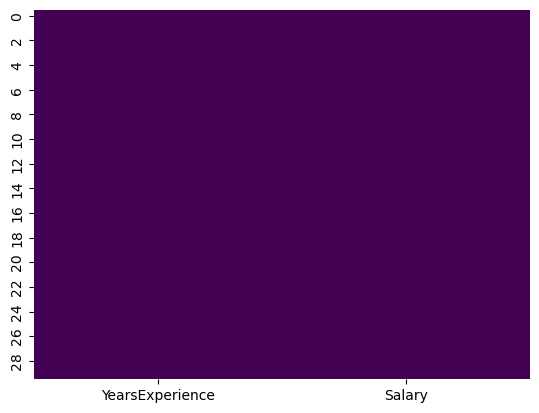

In [5]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Test and Training Data Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (24, 1)
X_test shape: (6, 1)
y_train shape: (24,)
y_test shape: (6,)


In [11]:
# converting into 2D array
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

## Linear Model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the result

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred

array([[36833.63210301],
       [34919.71472592],
       [67456.3101364 ],
       [59800.64062805],
       [92337.23603852],
       [81810.69046455]])

## Training set results

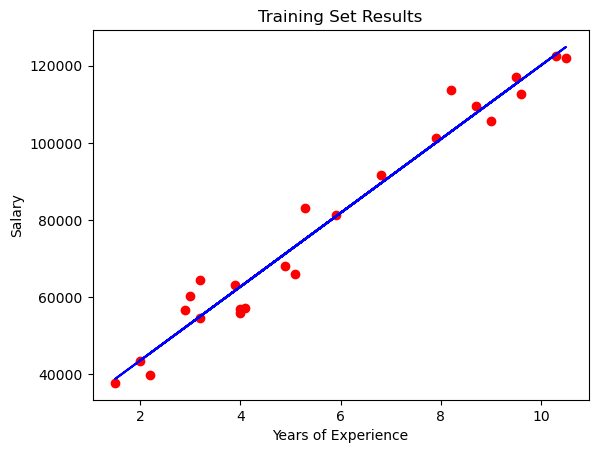

In [15]:
plt.scatter(X_train, y_train, color='Red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Training Set Results')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Test set results

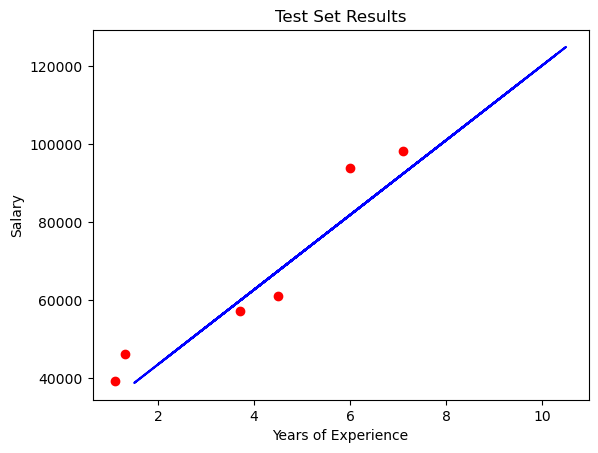

In [16]:
plt.scatter(X_test, y_test, color='Red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Test Set Results')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Evaluation

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

88.86956733784562